<a href="https://colab.research.google.com/github/satyaxo/email-spam-or-ham/blob/main/email_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/spam_ham_dataset.csv',encoding = "ISO-8859-1")

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.shape

(5171, 4)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 0','label'],inplace=True)

In [ ]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.rename(columns={'label_num':'target'},inplace=True)

In [ ]:
df.head()

,text,target
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,text,target
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [ ]:
df.duplicated().sum()


178

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(4993, 2)

In [ ]:
df.head()

,text,target
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
y=df.groupby(df['target']).count()
y

,text
target,
0,3531
1,1462


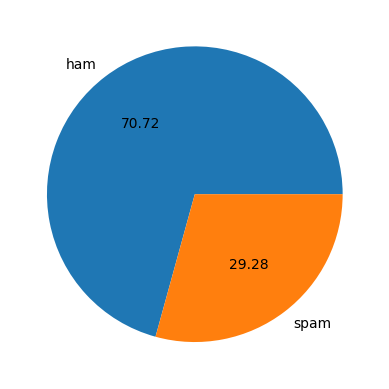

In [ ]:
import matplotlib.pyplot as plt
plt.pie(y['text'], labels=['ham','spam'],autopct="%0.2f")
plt.show()

 *Data is imbalanced*

**3.TEXT PREPROCESSING**

**Natural Language Toolkit:** *contains text processing libraries for tokenization,stemming, stopwords etc*



1.   **Tokenization:**The process of breaking down the text data into individual words, sentences, characters which are called as tokens.
2.   List item



In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,text,target,num_characters
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336


*spliting data  into words --> words tokenization*

In [ ]:
from nltk.tokenize import word_tokenize
text_to_words = word_tokenize(df['text'].iloc[0])
print(text_to_words)

['Subject', ':', 'enron', 'methanol', ';', 'meter', '#', ':', '988291', 'this', 'is', 'a', 'follow', 'up', 'to', 'the', 'note', 'i', 'gave', 'you', 'on', 'monday', ',', '4', '/', '3', '/', '00', '{', 'preliminary', 'flow', 'data', 'provided', 'by', 'daren', '}', '.', 'please', 'override', 'pop', "'", 's', 'daily', 'volume', '{', 'presently', 'zero', '}', 'to', 'reflect', 'daily', 'activity', 'you', 'can', 'obtain', 'from', 'gas', 'control', '.', 'this', 'change', 'is', 'needed', 'asap', 'for', 'economics', 'purposes', '.']


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(word_tokenize(x)))

In [ ]:
df.head()

,text,target,num_characters,num_words
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71


*spliting data  into sentences --> sentence tokenization*

In [ ]:
from nltk.tokenize import sent_tokenize
text_to_sentence = sent_tokenize(df['text'].iloc[0])
print(text_to_sentence)


['Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .', "please override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .", 'this change is needed asap for economics purposes .']


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(sent_tokenize(x)))

In [ ]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


**for ham type**

In [ ]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


**for spam type**

In [ ]:

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [ ]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

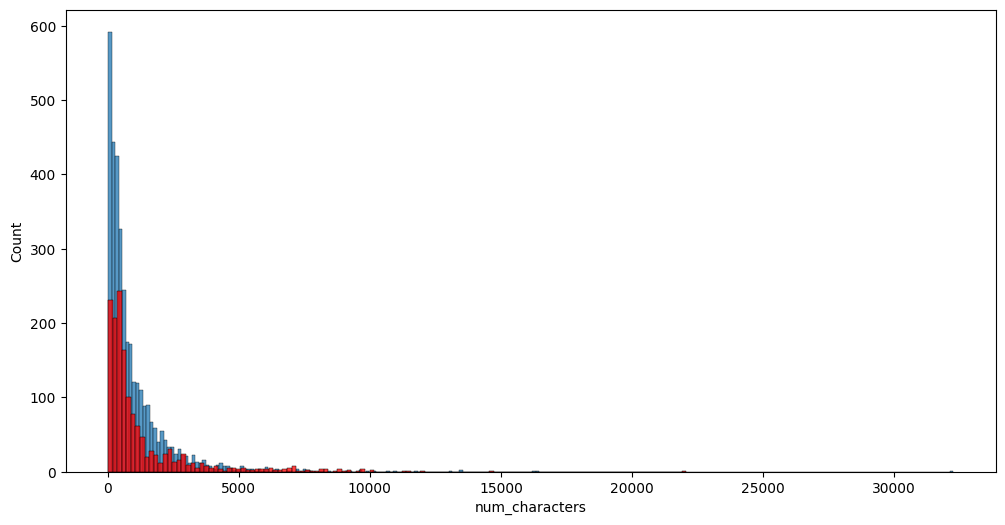

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

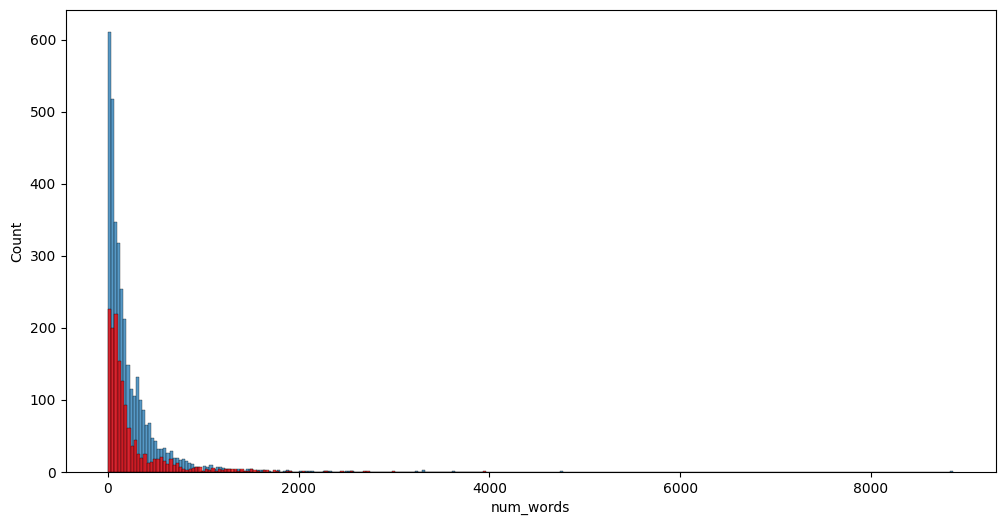

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')


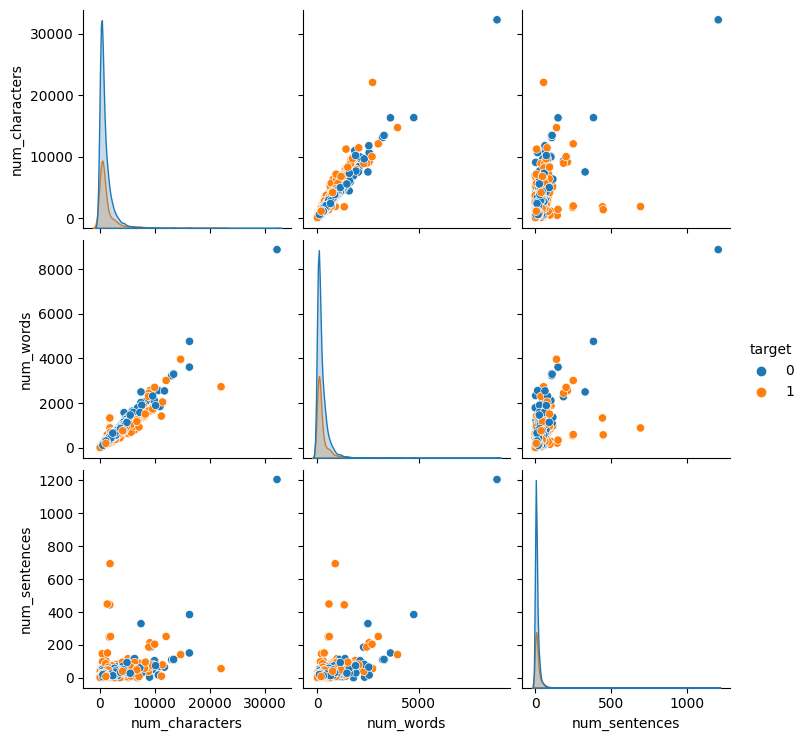

In [ ]:
sns.pairplot(df,hue='target')

<ipython-input-41-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

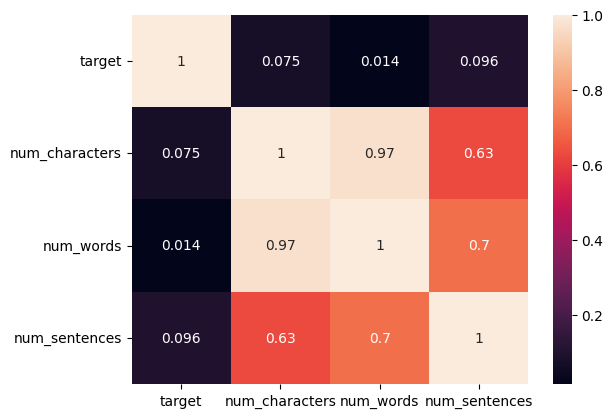

In [ ]:
sns.heatmap(df.corr(),annot=True)

**DATA PREPROCESSING**

**Stop words---> words which are repetitive and don’t hold any information**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text = 'Learn to lose your destiny to find where it leads you'
filtered_text = []
tokenized_word = word_tokenize(text)
for each_word in tokenized_word:
  if each_word not in  stopwords.words('english'):
    filtered_text.append(each_word)
print(text)
filtered_text

Learn to lose your destiny to find where it leads you


['Learn', 'lose', 'destiny', 'find', 'leads']

In [ ]:
import string

**Stemming is a process in which words are reduced to their root word (or) stem**

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()



*  Lower case
* Removing special characters
* Removing stop words and punctuation
* Stemming





In [ ]:

def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)


In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


**Understanding the words used in ham and spam sms and finding out the most used words respectively**

In [ ]:
spam_ls = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_ls.append(word)
spam_ls

['subject',
 'photoshop',
 'window',
 'offic',
 'cheap',
 'main',
 'trend',
 'abas',
 'darer',
 'prudent',
 'fortuit',
 'undergon',
 'lightheart',
 'charm',
 'orinoco',
 'taster',
 'railroad',
 'affluent',
 'pornograph',
 'cuvier',
 'irvin',
 'parkhous',
 'blameworthi',
 'chlorophyl',
 'robe',
 'diagrammat',
 'fogarti',
 'clear',
 'bayda',
 'inconvenienc',
 'manag',
 'repres',
 'smart',
 'hashish',
 'academi',
 'sharehold',
 'unload',
 'bad',
 'danielson',
 'pure',
 'caffein',
 'spaniard',
 'chargeabl',
 'levin',
 'subject',
 'look',
 'medic',
 'best',
 'sourc',
 'difficult',
 'make',
 'materi',
 'condit',
 'better',
 'best',
 'law',
 'easi',
 'enough',
 'ruin',
 'bad',
 'law',
 'excus',
 'found',
 'best',
 'simpliest',
 'site',
 'medic',
 'net',
 'perscript',
 'easi',
 'deliveri',
 'privat',
 'secur',
 'easi',
 'better',
 'see',
 'rightli',
 'pound',
 'week',
 'squint',
 'million',
 'got',
 'anyth',
 'ever',
 'want',
 'erect',
 'treatment',
 'pill',
 'anti',
 'depress',
 'pill',
 'wei

In [ ]:
len(spam_ls)

196592

In [ ]:
from nltk.probability import FreqDist
spam_words = FreqDist(spam_ls)
print(spam_words)


<FreqDist with 32994 samples and 196592 outcomes>


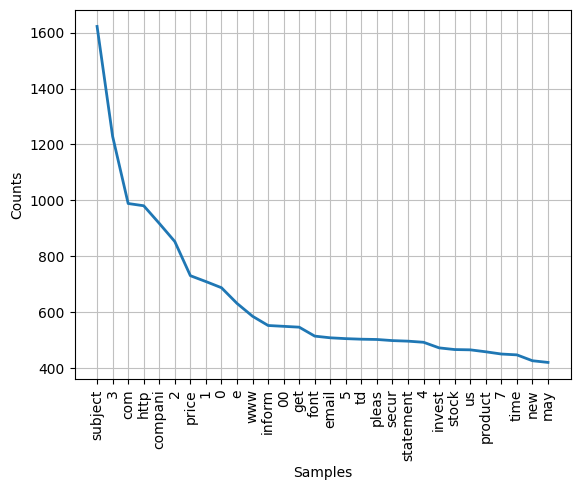

In [ ]:
spam_words.plot(30)
plt.show()

In [ ]:
ham_ls= []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_ls.append(word)

In [ ]:
ham_words = FreqDist(ham_ls)
print(ham_words)

<FreqDist with 16354 samples and 380475 outcomes>


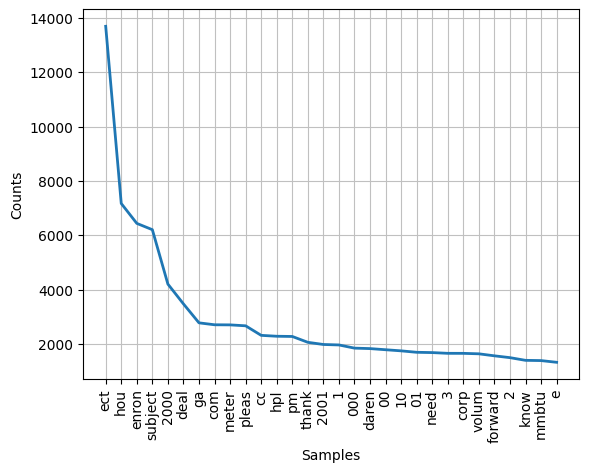

In [ ]:
ham_words.plot(30)
plt.show()

 **DATA TRANSFORMATION**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
X


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(4993, 42592)

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

# *Train test split*

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'KN' : knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'GBDT':gbdt
}

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.8448448448448449
Precision -  0.6666666666666666
For  DT
Accuracy -  0.8458458458458459
Precision -  0.672093023255814
For  LR
Accuracy -  0.978978978978979
Precision -  0.9517684887459807
For  RF
Accuracy -  0.972972972972973
Precision -  0.9508196721311475
For  AdaBoost
Accuracy -  0.938938938938939
Precision -  0.8801261829652997
For  GBDT
Accuracy -  0.9379379379379379
Precision -  0.8726708074534162
